In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
folder_path ='datasets/'
csv_files = [
    'athlete_events', 
    'cities', 
    'countries',
    'gdp',
    'noc_regions',
    'political_regime',
    'poverty',
    'healthcare_expenditure_gdp',
    'obesity_adults',
    'population_per_country']
csv = '.csv'

In [39]:
events = pd.read_csv(folder_path+'athlete_events.csv')
regions = pd.read_csv(folder_path+'noc_regions.csv')
events = events.merge(regions, left_on='NOC', right_on='NOC')
events = events[['ID','Sex','Age','Height','Weight','region','Games','Year','Season','Sport','Event','Medal']]
events[events['Medal']=='Silver']


,ID,Sex,Age,Height,Weight,region,Games,Year,Season,Sport,Event,Medal
63,20,M,22.0,176.0,85.0,Norway,1994 Winter,1994,Winter,Alpine Skiing,Alpine Skiing Men's Downhill,Silver
67,20,M,22.0,176.0,85.0,Norway,1994 Winter,1994,Winter,Alpine Skiing,Alpine Skiing Men's Combined,Silver
86,25,M,24.0,NaN,NaN,Norway,1920 Summer,1920,Summer,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver
92,30,M,26.0,189.0,72.0,Netherlands,1996 Summer,1996,Summer,Rowing,Rowing Men's Lightweight Double Sculls,Silver
106,38,M,20.0,NaN,NaN,Norway,1920 Summer,1920,Summer,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver
...,...,...,...,...,...,...,...,...,...,...,...,...
270664,135522,M,23.0,189.0,80.0,Netherlands,2004 Summer,2004,Summer,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Silver
270666,135523,M,25.0,200.0,93.0,Netherlands,1992 Summer,1992,Summer,Volleyball,Volleyball Men's Volleyball,Silver
270697,135544,M,21.0,175.0,70.0,Poland,1980 Summer,1980,Summer,Athletics,Athletics Men's 4 x 100 metres Relay,Silver
270729,135553,F,25.0,168.0,80.0,Russia,1956 Summer,1956,Summer,Athletics,Athletics Women's Shot Put,Silver


### 1st option top 10 medalists

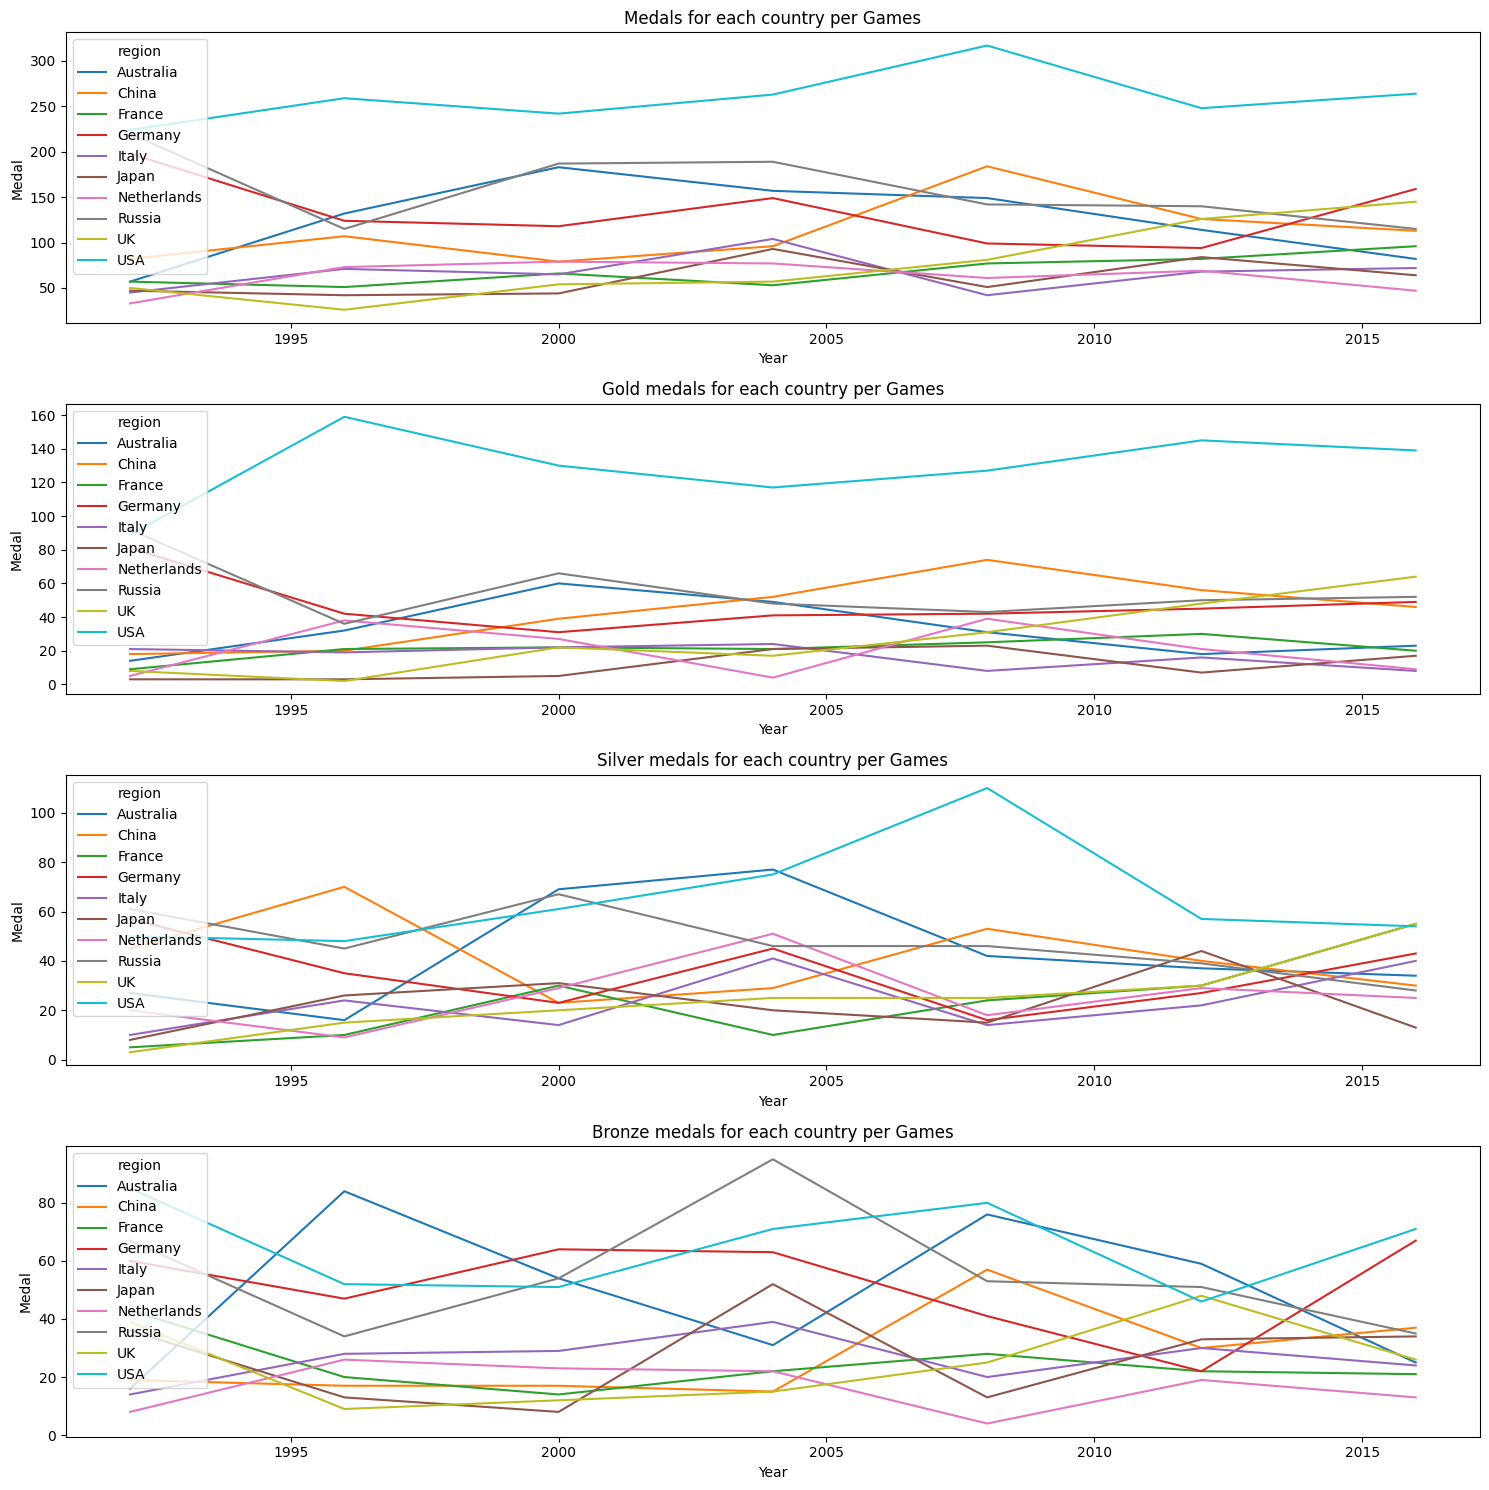

In [42]:
medalists = events.loc[(events['Year']>1990)&(~events['Medal'].isna())&(events['Season']=='Summer')]
top_medalists = medalists.groupby('region')['Medal'].count().reset_index().sort_values(by='Medal',ascending=False).head(10)
best_countries = medalists[medalists['region'].isin(top_medalists['region'])]

medalists = best_countries.groupby(['Year','region'])['Medal'].count().reset_index().sort_values(by='Year')
gold_medalists = best_countries[best_countries['Medal']=='Gold'].groupby(['Year','region'])['Medal'].count().reset_index().sort_values(by='Year')
silver_medalists = best_countries[best_countries['Medal']=='Silver'].groupby(['Year','region'])['Medal'].count().reset_index().sort_values(by='Year')
bronze_medalists = best_countries[best_countries['Medal']=='Bronze'].groupby(['Year','region'])['Medal'].count().reset_index().sort_values(by='Year')

fig, axs = plt.subplots(4, 1, figsize=(15,15))

sns.lineplot(data=medalists, x='Year', y='Medal', hue='region', ax=axs[0])
axs[0].set_title('Medals for each country per Games')
sns.lineplot(data=gold_medalists, x='Year', y='Medal', hue='region', ax=axs[1])
axs[1].set_title('Gold medals for each country per Games')
sns.lineplot(data=silver_medalists, x='Year', y='Medal', hue='region', ax=axs[2])
axs[2].set_title('Silver medals for each country per Games')
sns.lineplot(data=bronze_medalists, x='Year', y='Medal', hue='region', ax=axs[3])
axs[3].set_title('Bronze medals for each country per Games')
plt.tight_layout()
plt.show()

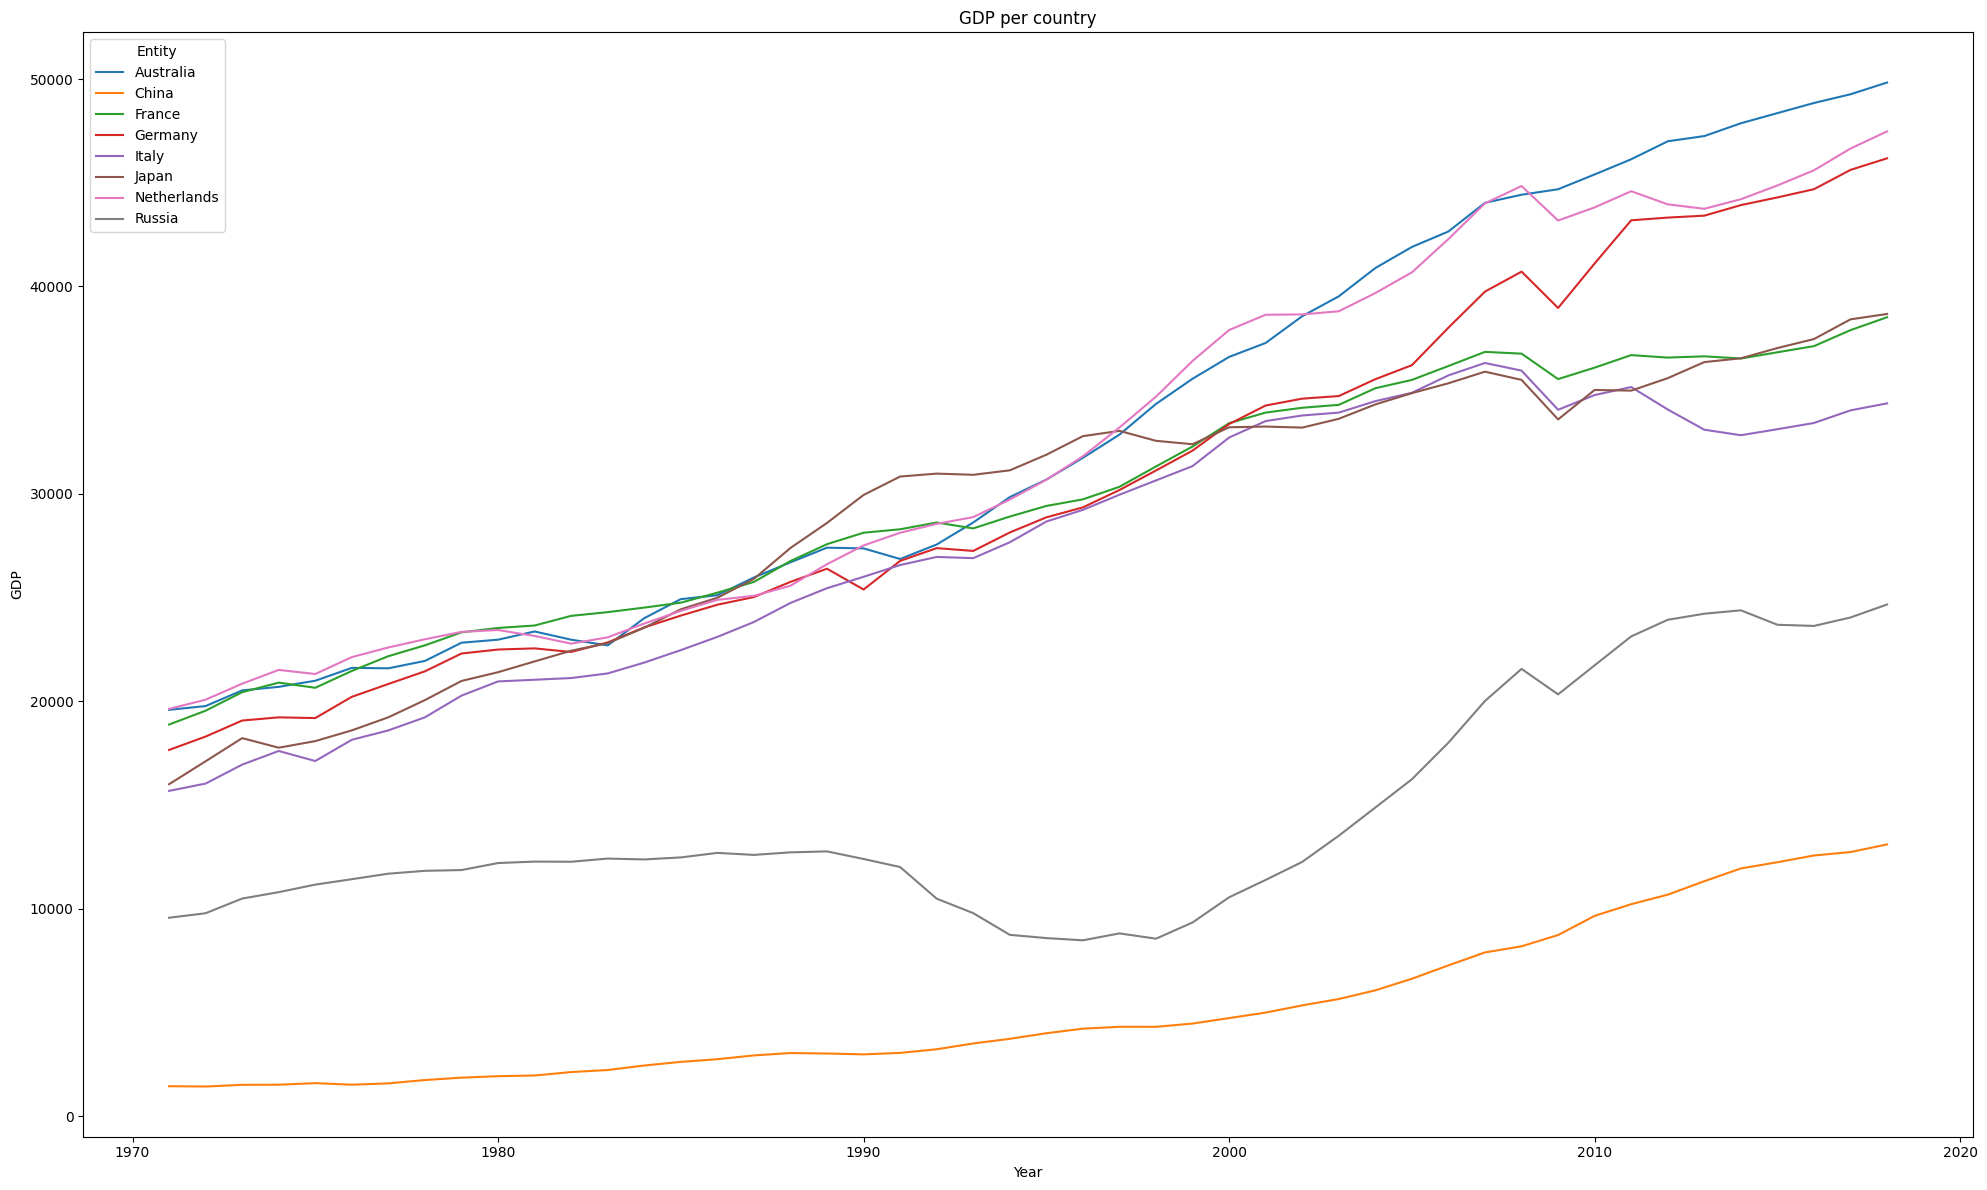

In [48]:
gdp = pd.read_csv(folder_path+'gdp.csv')
gdp_1st = gdp[(gdp['Entity'].isin(best_countries['region']))&(gdp['Year']>1970)]

In [62]:
political_regime = pd.read_csv(folder_path+'political_regime.csv')
political_regime_1st = political_regime[(political_regime['Entity'].isin(best_countries['region']))&(political_regime['Year']>1970)]
political_regime_1st.head()

,Entity,Code,Year,Political regime
1107,Australia,AUS,1971,3
1108,Australia,AUS,1972,3
1109,Australia,AUS,1973,3
1110,Australia,AUS,1974,3
1111,Australia,AUS,1975,3


In [60]:
poverty = pd.read_csv(folder_path+'poverty.csv')
poverty_1st = poverty[(poverty['Country'].isin(best_countries['region']))&(poverty['Year']>1970)]
poverty_1st.head()

,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,...,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
74,Australia,1981,0.495952,0.993503,1.246238,1.747674,3.248711,17.247700,44.993355,63.745530,...,48.778122,60.765446,89.334200,28.412369,48.285995,1.132451,5.100427,4.370160,2.129291,2.052401
75,Australia,1985,0.668273,1.001310,1.337002,2.031465,3.336158,17.007612,44.334503,63.342876,...,50.117817,63.223244,96.222755,27.759943,47.950400,1.209931,5.386668,4.565898,2.209732,2.066267
76,Australia,1989,0.498228,0.744275,0.995125,1.992724,3.723090,17.244429,42.499397,60.749190,...,51.392020,64.727680,100.426186,27.294485,48.038662,1.255912,5.578969,4.601946,2.200241,2.091564
77,Australia,1995,0.496728,0.749782,1.221602,1.749769,3.238252,19.971542,47.499493,66.448870,...,46.783363,59.129080,92.229000,27.757864,47.640434,1.227099,5.332185,4.445008,2.186178,2.033232
78,Australia,2001,0.747412,0.747412,0.992065,1.476827,2.485266,14.489156,39.742588,57.449104,...,54.768540,68.360070,108.263275,27.073807,47.860560,1.284107,5.535934,4.494122,2.218490,2.025757


In [64]:
health = pd.read_csv(folder_path+'healthcare_expenditure_gdp.csv')
health_1st = health[(health['Entity'].isin(best_countries['region']))&(health['Year']>1970)]
health_1st.rename(columns={'Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)':'heatlh exprenditure'}, inplace=True)
health_1st.head()

C:\Users\olows\AppData\Local\Temp\ipykernel_12276\4235747770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_1st.rename(columns={'Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)':'heatlh exprenditure'}, inplace=True)


,Entity,Code,Year,heatlh exprenditure
218,Australia,AUS,2000,7.59
219,Australia,AUS,2001,7.68
220,Australia,AUS,2002,7.88
221,Australia,AUS,2003,7.88
222,Australia,AUS,2004,8.09


In [69]:
obesity = pd.read_csv(folder_path+'obesity_adults.csv')
obesity_1st = obesity[(obesity['Entity'].isin(best_countries['region']))&(obesity['Year']>1970)]
obesity_1st.rename(columns={'Prevalence of obesity among adults, BMI >= 30 (crude estimate) (%) - Sex: both sexes - Age group: 18+  years':'obesity rate +18 age'}, inplace=True)
obesity_1st.head()

C:\Users\olows\AppData\Local\Temp\ipykernel_12276\1068671593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obesity_1st.rename(columns={'Prevalence of obesity among adults, BMI >= 30 (crude estimate) (%) - Sex: both sexes - Age group: 18+  years':'obesity rate +18 age'}, inplace=True)


,Entity,Code,Year,obesity rate +18 age
420,Australia,AUS,1975,10.5
421,Australia,AUS,1976,10.7
422,Australia,AUS,1977,11.0
423,Australia,AUS,1978,11.3
424,Australia,AUS,1979,11.5


In [107]:
population = pd.read_csv(folder_path+'population_per_country.csv')
population_1st = population.loc[population['Country (or dependency)'].isin(best_countries['region'])].copy()
population_1st.rename(columns={'Country (or dependency)':'Country', 'Density (P/Km²)':'Density'}, inplace=True)
population_1st['Population (2023)'] = population_1st['Population (2023)'].str.replace(',', '')
population_1st = population_1st.astype({'Density':'int64', 'Population (2023)':'int64'})
population_1st.head()

,#,Country,Population (2023),Yearly Change,Net Change,Density,Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
1,2,China,1425671352,-0.02 %,"-215,985",152,"9,388,211","-310,220",1.2,39.0,65 %,17.72 %
8,9,Russia,144444359,-0.19 %,"-268,955",9,"16,376,870","-136,414",1.5,39.0,75 %,1.80 %
11,12,Japan,123294513,-0.53 %,"-657,179",338,"364,555","99,994",1.3,49.0,94 %,1.53 %
18,19,Germany,83294633,-0.09 %,"-75,210",239,"348,560","155,751",1.5,45.0,77 %,1.04 %
22,23,France,64756584,0.20 %,"129,956",118,"547,557","67,761",1.8,42.0,84 %,0.80 %


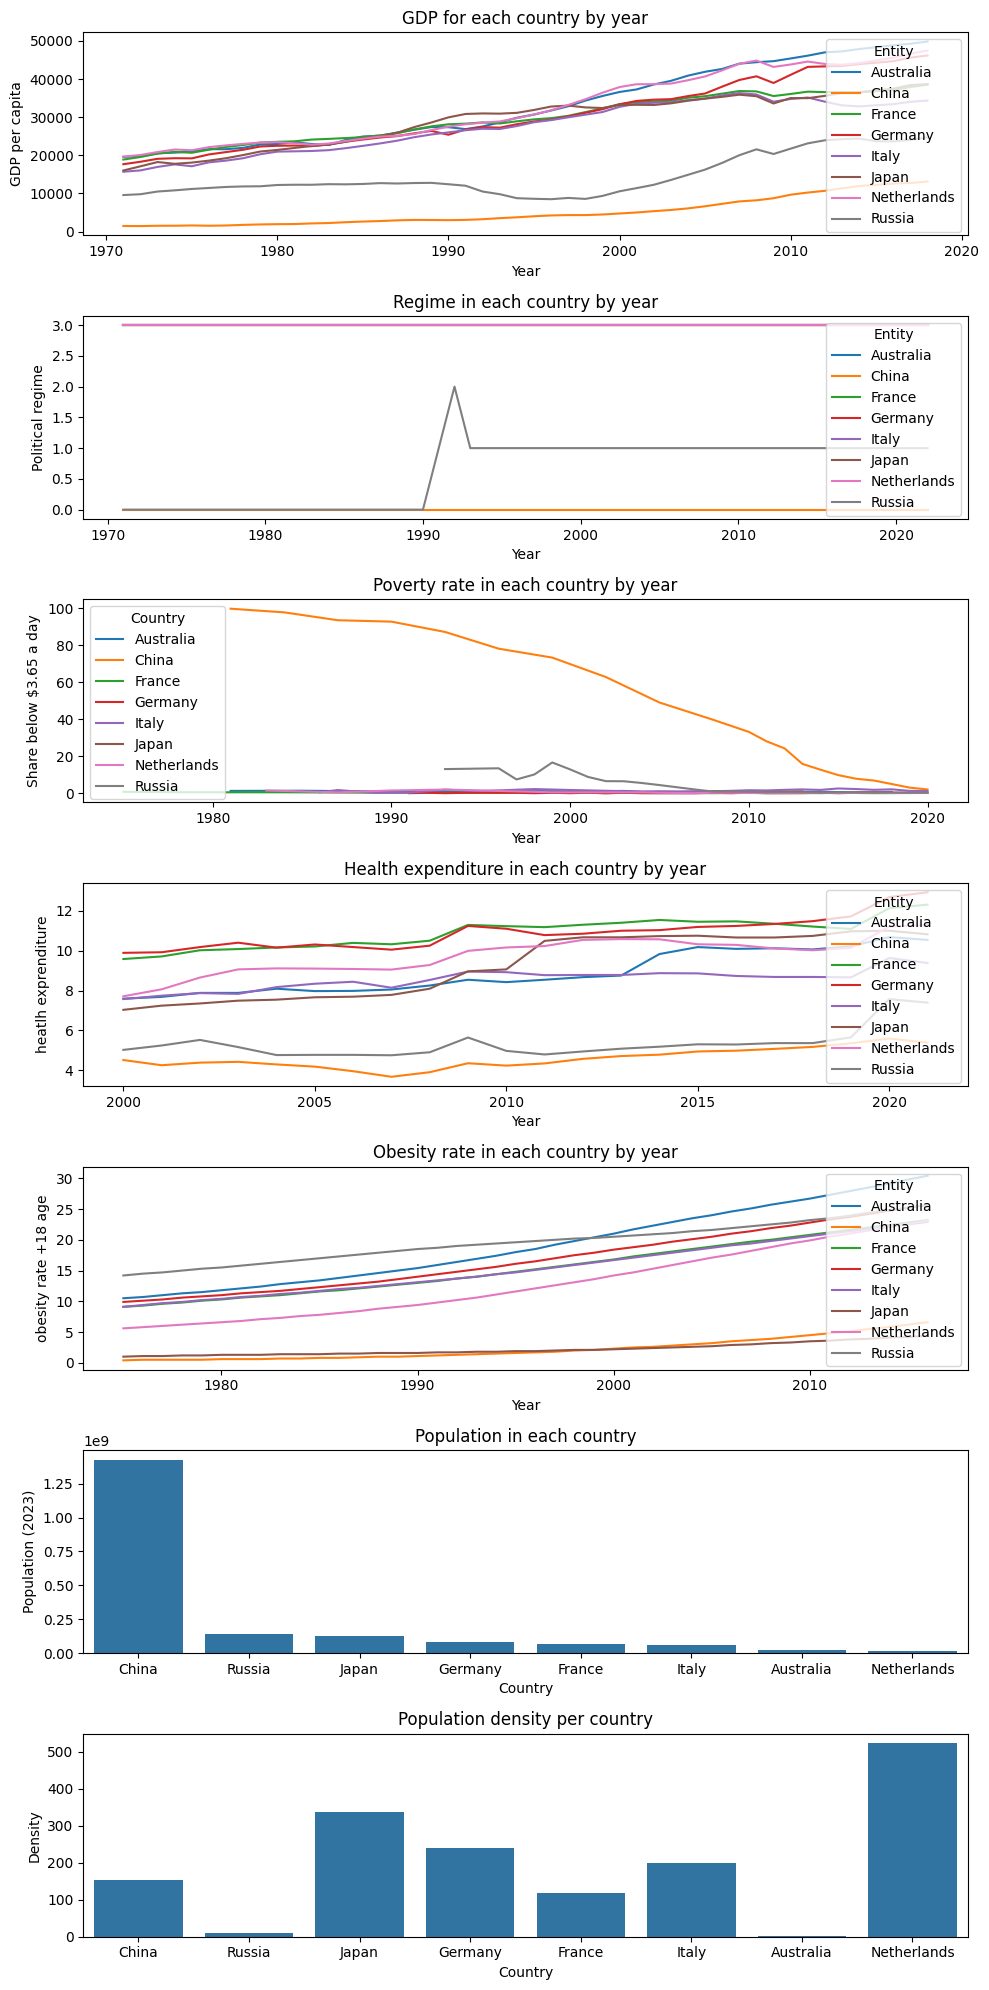

In [108]:
fig, axs = plt.subplots(7, 1, figsize=(10,20))
### GDP plot
sns.lineplot(data=gdp_1st, x='Year', y='GDP per capita', hue='Entity', ax=axs[0])
axs[0].set_title('GDP for each country by year')
### political regime plot
sns.lineplot(data=political_regime_1st, x='Year', y='Political regime', hue='Entity', ax=axs[1])
axs[1].set_title('Regime in each country by year')
### poverty plot
sns.lineplot(data=poverty_1st, x='Year', y='Share below $3.65 a day', hue='Country', ax=axs[2])
axs[2].set_title('Poverty rate in each country by year')
### health expenditure plot
sns.lineplot(data=health_1st, x='Year', y='heatlh exprenditure', hue='Entity', ax=axs[3])
axs[3].set_title('Health expenditure in each country by year')
### obesity rate plot
sns.lineplot(data=obesity_1st, x='Year', y='obesity rate +18 age', hue='Entity', ax=axs[4])
axs[4].set_title('Obesity rate in each country by year')
### population plot
sns.barplot(x='Country', y='Population (2023)', data=population_1st, bottom=0, ax=axs[5])
axs[5].set_title('Population in each country')
### population density plot
sns.barplot(data=population_1st, x='Country', y='Density', bottom=0, ax=axs[6])
axs[6].set_title('Population density per country')

plt.tight_layout()
plt.show()

In [3]:
medalists = df.loc[df['Medal']!='NaN']
gold_medalists = medalists.groupby(['Year','NOC'])['Medal'].count().reset_index().sort_values(by='Medal', ascending=False)

In [4]:
gold_medalists.head()

,Year,NOC,Medal
1140,1980,URS,496
57,1904,USA,394
88,1908,GBR,368
1443,1988,URS,366
1289,1984,USA,361


In [5]:
gold_medalists = gold_medalists.loc[(gold_medalists['Year']>1990)&(gold_medalists['Medal']>30)]

In [6]:
gold_medalists['Year'] = gold_medalists['Year'].astype('str')

In [7]:
gold_medalists.dtypes

Year     object
NOC      object
Medal     int64
dtype: object

In [8]:
gold_medalists = gold_medalists.dropna()

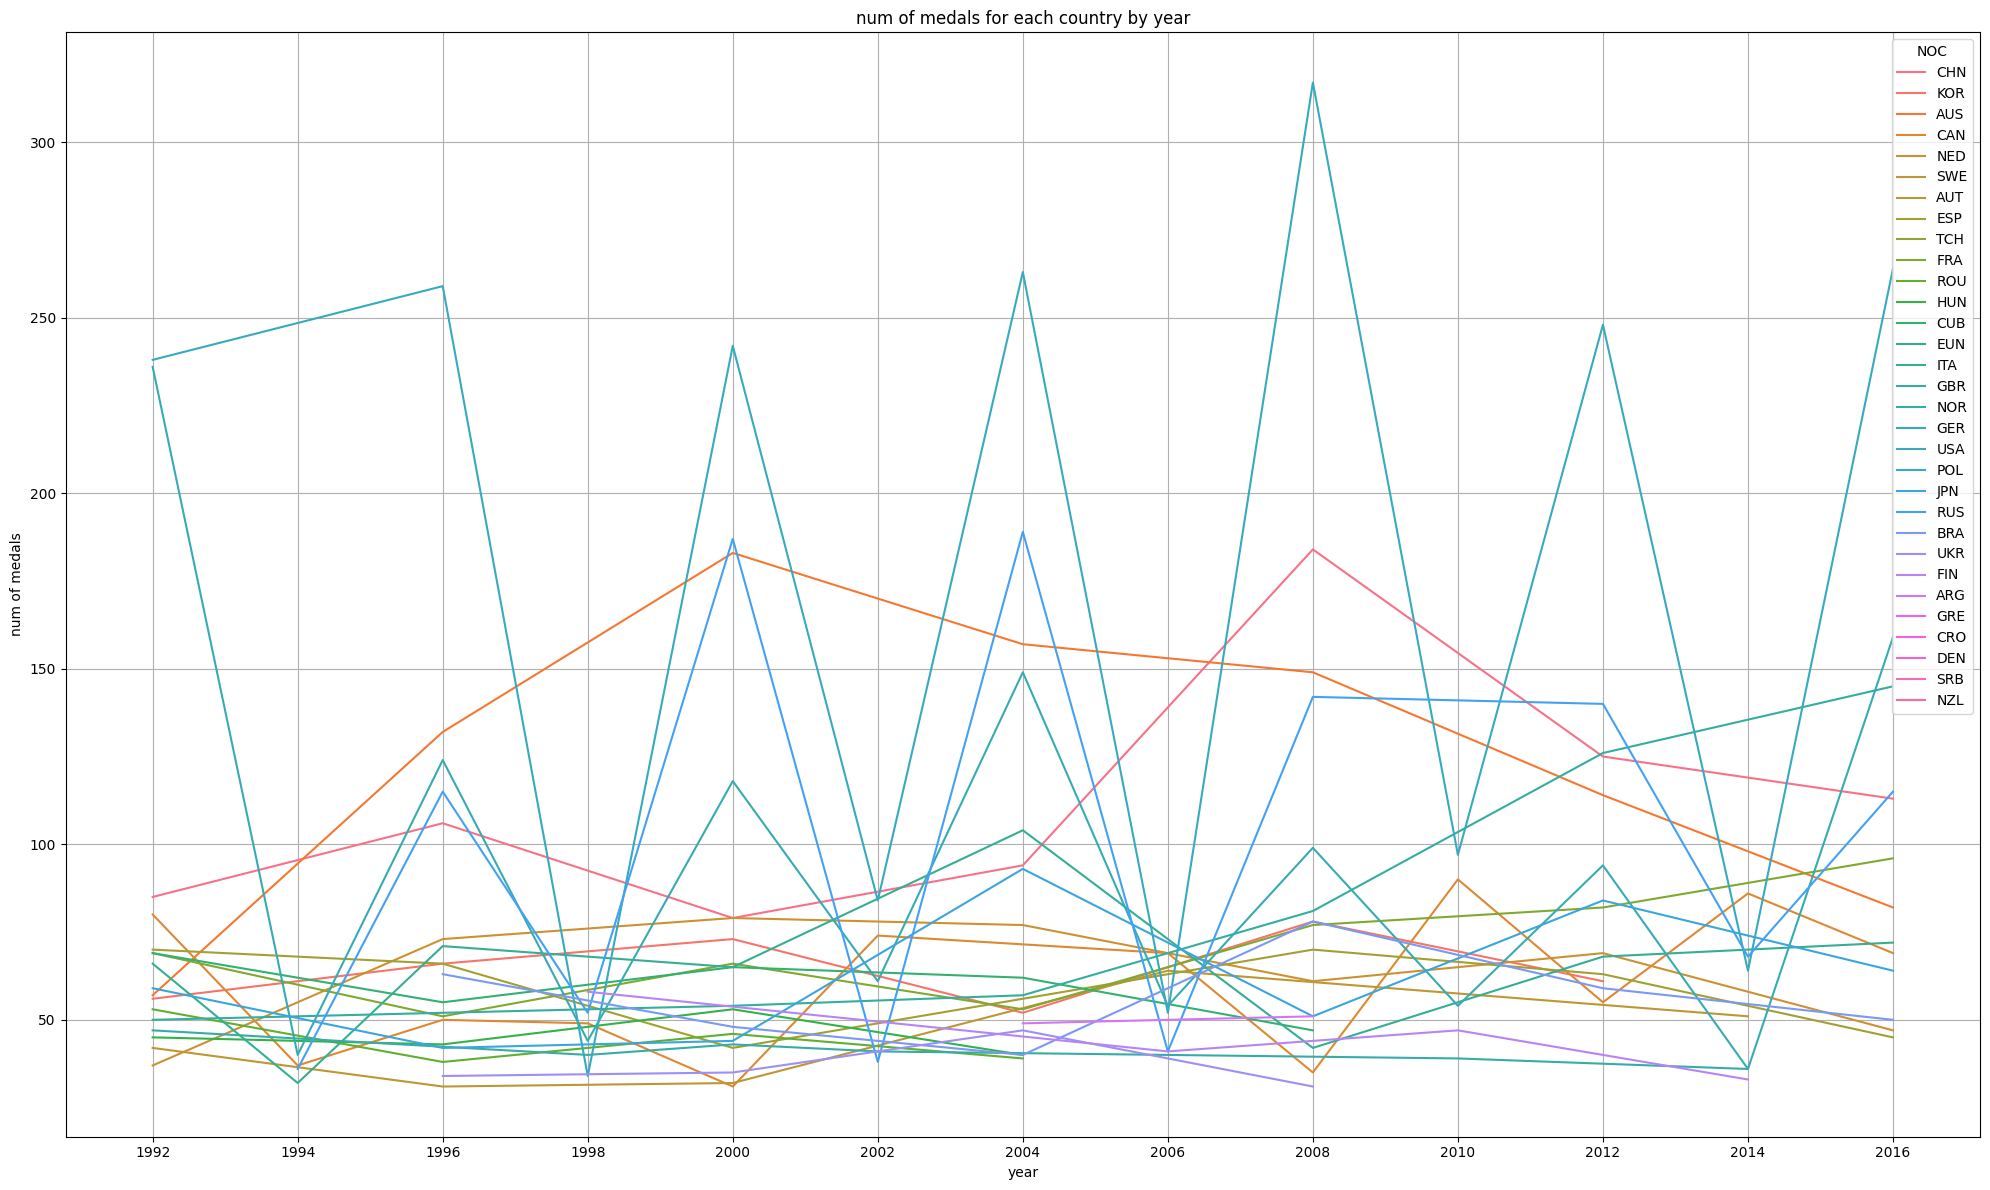

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,12))
gold_medalists.sort_values(by='Year', ascending=True, inplace=True)
teams = gold_medalists['NOC'].unique()

sns.lineplot(data= gold_medalists, x= 'Year', y= 'Medal', hue='NOC')

plt.xlabel('year')
plt.ylabel('num of medals')
plt.title('num of medals for each country by year')

plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='NOC', ylabel='Medal'>

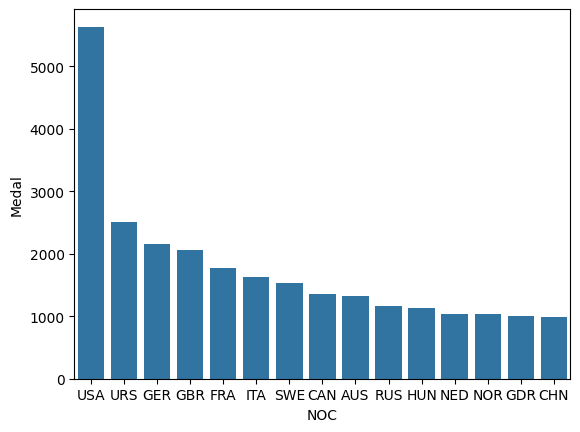

In [25]:
countries = medalists.groupby('NOC')['Medal'].count().reset_index().sort_values(by='Medal', ascending=False)
best = countries.head(15)
sns.barplot(data= best, x='NOC', y='Medal')

In [22]:
countries.head()

,NOC,Medal
216,USA,5637
214,URS,2503
79,GER,2165
74,GBR,2068
69,FRA,1777
